<a href="https://colab.research.google.com/github/Ganesh9100/Mask-Detection-YOLO_V3-/blob/master/YoloV3_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the Darknet repository for yolo architecture 

In [1]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 13939 (delta 9), reused 16 (delta 8), pack-reused 13914
Receiving objects: 100% (13939/13939), 12.44 MiB | 4.56 MiB/s, done.
Resolving deltas: 100% (9518/9518), done.


Here we are going to make change in the Make File for further computatuion with colab , i have made gpu to 1 and oepncv for future detection to 1

In [2]:

%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile  #stream editor means  sed   g-global replacement 
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile  # this is for to visualize or to use camera
!cat Makefile   #Cat(concatenate) , it will read the make file  and will show the output 
!make 

/content/darknet
GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)
# set ZED_CAMERA=1 to enable ZED SDK 3.0 and above
# set ZED_CAMERA_v2_8=1 to enable ZED SDK 2.X

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetso

Download the respective weight for the respective cfg file , As for yolov3 i have used yolov3.cfg and darknet53.conv.74 weights . 
For Yolov4 you can refer to Alexab github page

In [3]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-07-12 09:32:25--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   880KB/s    in 2m 34s  

2020-07-12 09:35:00 (1.00 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



I have made the data set and annotated it with LabelImg tool , and uploaded to darknet/data directory . 
You should move the obj.data obj.names and train.txt with the dataset to darknet/data directory .

In [4]:
!unzip data/custom.zip -d data/ # adjust the dataset filename path and name

Archive:  data/custom.zip
   creating: data/custom/
  inflating: data/custom/obj.data    
   creating: data/custom/images/
  inflating: data/custom/images/0-with-mask.txt  
  inflating: data/custom/images/146-with-mask.txt  
  inflating: data/custom/images/173-with-mask.txt  
  inflating: data/custom/images/105-with-mask.txt  
  inflating: data/custom/images/1-with-mask.txt  
  inflating: data/custom/images/1.txt  
  inflating: data/custom/images/40-with-mask.txt  
  inflating: data/custom/images/2.txt  
  inflating: data/custom/images/3.txt  
  inflating: data/custom/images/9-with-mask.txt  
  inflating: data/custom/images/10-with-mask.txt  
  inflating: data/custom/images/11-with-mask.txt  
  inflating: data/custom/images/12-with-mask.txt  
  inflating: data/custom/images/13-with-mask.txt  
  inflating: data/custom/images/14-with-mask.txt  
  inflating: data/custom/images/14.txt  
  inflating: data/custom/images/15.txt  
  inflating: data/custom/images/16-with-mask.txt  
  inflating:

Here I have made changes to the yolov3.cfg file according to the data set .
Mandatory , 
random 0 to 1 
Max_batch = No_of classes * 2000
filters=(classes + 5)x3 
subdivitions should be 8 
batches to 32

In [5]:
!sed -i 's/batch=1/batch=32/g' cfg/yolov3.cfg
!sed -i 's/subdivisions=1/subdivisions=8/g' cfg/yolov3.cfg
!sed -i 's/random=1/random=0/g' cfg/yolov3.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/g' cfg/yolov3.cfg
!sed -i 's/steps=400000,450000/steps=3200,3600/g' cfg/yolov3.cfg
!sed -i 's/classes=80/classes=2/g' cfg/yolov3.cfg
!sed -i 's/filters=255/filters=21/g' cfg/yolov3.cfg
!cat cfg/yolov3.cfg

[net]
# Testing
batch=32
subdivisions=8
# Training
# batch=64
# subdivisions=86
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 4000
policy=steps
steps=3200,3600
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutional]
ba

**Training The Data**

Darknet is the detector where it is gonna train data with following files with weights and cfg

In [51]:
!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.572530, GIOU: 0.547127), Class: 0.631730, Obj: 0.050642, No Obj: 0.004616, .5R: 0.750000, .75R: 0.000000, count: 4, class_loss = 1.160127, iou_loss = 0.838438, total_loss = 1.998564 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.001485, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.006641, iou_loss = 0.000000, total_loss = 0.006641 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000692, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.006349, iou_loss = 0.000000, total_loss = 0.006349 
 total_bbox = 11757, rewritten_bbox = 0.068045 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.340664, GIOU: 0.210637), Class: 0.503267, Obj: 0.077462, No Obj: 

**Copy or Download the weights**


In [56]:
import shutil


shutil.copy("/content/darknet/backup/yolov3_last.weights","/content/weights")

'/content/weights/yolov3_last.weights'

*I have made till 700 iteration first , then analyzed further iteration will take to better accuracy so, went till 1300*


**Use of map instead of train with the last weight**

see the output in mAP ( mean avg precision ) , try with different weights and choose the highest mAP for detection

**I have seen the mAP increases with iteration so went till 1300**

In [61]:
!./darknet detector map data/obj.data cfg/yolov3.cfg /content/weights/yolov3_700.weights -dont_show

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

In [21]:
!./darknet detector map data/obj.data cfg/yolov3.cfg /content/weights/yolov3_800.weights -dont_show

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

In [22]:
!./darknet detector map data/obj.data cfg/yolov3.cfg /content/weights/yolov3_900.weights -dont_show

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

*Unfortunately i have deleted the training to minimize the page length*

**Testing**

***Image Without the Mask***

In [118]:
!./darknet detector test data/obj.data cfg/yolov3.cfg /content/weights/yolov3_1300.weights /content/darknet/data/image_test01.jpg -dont_show

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

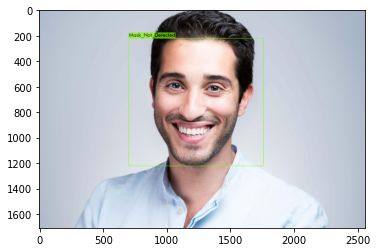

In [119]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    else:
      print('failed to open file')
    
display_image()

**Image with Mask**

In [121]:
!./darknet detector test data/obj.data cfg/yolov3.cfg /content/weights/yolov3_1300.weights /content/darknet/data/testt.jpg -dont_show

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

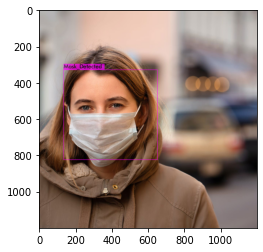

In [122]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    else:
      print('failed to open file')
    
display_image()

In [110]:
import shutil

shutil.copy("/content/darknet/backup/yolov3_last.weights","/content/weights")


'/content/weights/yolov3_last.weights'

**Comparing the mAP of weight file 1300 and 1200**

***We can see the mAP of 1300 is higher than 1200th weight file , so,above we have used 1300th weight file for detecting***

In [112]:
!./darknet detector map data/obj.data cfg/yolov3.cfg /content/weights/yolov3_1300.weights -dont_show

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

In [114]:
!./darknet detector map data/obj.data cfg/yolov3.cfg /content/weights/yolov3_1200.weights -dont_show

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv   

**For Video Input Detection**

In [140]:
from google.colab import files

uploaded = files.upload()

Saving MEE.mp4 to MEE.mp4


**I have set the threshold to 0.6 , it works well we can have the min thresh of 0.5 for good model**

In [143]:
!pwd
!./darknet detector demo data/obj.data cfg/yolov3.cfg /content/weights/yolov3_1300.weights -dont_show MEE.mp4 -i 0 -out_filename me_06.avi -thresh 0.6


/content/darknet
 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128

**SUMMARY**

* detections_count = 1995, unique_truth_count = 1106  

class_id = 0, name = **Mask_Detected , ap = 98.04%**   	 **(TP = 681, FP = 29)** 

class_id = 1 name = **Mask_Not_Detected, ap = 96.70%**   	 **(TP = 385, FP = 18)**

 for conf_thresh = 0.25, precision = 0.96, recall = 0.96, F1-score = 0.96 
 for conf_thresh = 0.25, TP = 1066, FP = 47, FN = 40, **average IoU = 71.77 %** 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 **mean average precision (mAP@0.50) = 0.973706, or 97.37 %** 
Total Detection Time: 33 Seconds
